# Problem 1 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [10]:
def problem1(file):
    df = pd.read_csv(file) #read the csv file 
    #pal = ["#3d59ab", "#00ced1", "#eead0e", "#b23aee","#cd3333","458b00","#3d59ab"]
    ax = df.plot(kind='area', figsize=(10, 7)) #creates a stacked area plot 
    ax.legend(loc='upper left',frameon=False ) # we use this to create a legend in the top left corner
    ax.yaxis.get_major_ticks()[0].label1.set_visible(False)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x*1e-6) + 'M'))
    axis_font = {'size':'20'} #font size of the axis (x and y) 
    ax.set_xlabel("Year",**axis_font) #x label
    ax.set_ylabel("Unemployment",**axis_font) #y label
    plt.show() #display the chart 

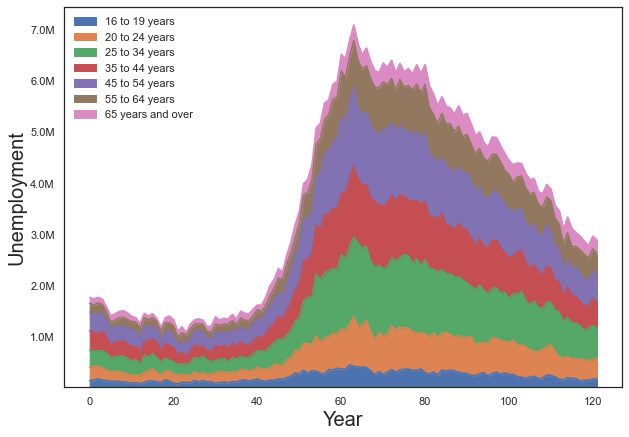

In [11]:
problem1("monthly_unemployment_by_ages.csv")

# Problem 2 

In [4]:
def problem2(file):
    df = pd.read_csv(file) #read the csv file into Jupyter Notebook
    sns.set_style(style='white')  # we use seasborn to set the style of this plot to white
    fig, ax1 = plt.subplots(figsize=(5, 4.5))
    ax2 = ax1.twinx()
    plot_1 = ax2.plot(df.china, 'b-v',lw=1,ms=4,label="china (right-axis)") # we make the plot for china 
    plot_2= ax1.plot(df.rest, 'r-s',lw=1,ms=4,label="rest (left-axis)") # we make the plot for the rest
    plot_1, labels_1 = ax1.get_legend_handles_labels() # plot labels for China
    plot_2, labels_2 = ax2.get_legend_handles_labels() # plot labels for the rest
    lines = plot_1 + plot_2
    labels = labels_1 + labels_2
    ax1.legend(lines, labels, loc=0,frameon=False) # create the legend for the plot 
    ax1.spines['top'].set_visible(False) # create the spines
    sns.despine(ax=ax2)
    ax1.set_title('Number of cases') #title of the plot
    ax1.set_xlabel('Days') # x-axis label 
    plt.tight_layout()
    plt.savefig('problem2.png') #save the figure as a png file 
    plt.show()

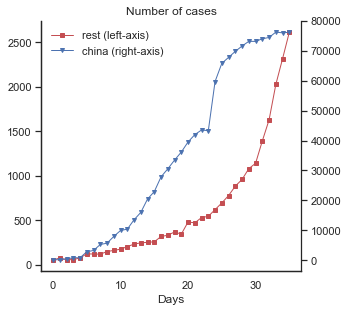

In [5]:
problem2("corona_china_vs_rest.csv")

# Problem 3 

In [18]:
def problem3(file):
    data = pd.read_csv(file)
    df = data.groupby(['broad_field','year'],as_index=False)[['n_phds']].sum()
    education = df[df['broad_field']=='Education'].min()[2], df[df['broad_field']=='Education'].max()[2]
    engineering = df[df['broad_field']=='Engineering'].min()[2], df[df['broad_field']=='Engineering'].max()[2]
    Humanities = df[df['broad_field']=='Humanities and arts'].min()[2], df[df['broad_field']=='Humanities and arts'].max()[2]
    sciences = df[df['broad_field']=='Life sciences'].min()[2], df[df['broad_field']=='Life sciences'].max()[2]
    math = df[df['broad_field']=='Mathematics and computer sciences'].min()[2], df[df['broad_field']=='Mathematics and computer sciences'].max()[2]
    other = df[df['broad_field']=='Other'].min()[2],df[df['broad_field']=='Other'].max()[2]
    psychology  =  df[df['broad_field']=='Psychology and social sciences'].min()[2],df[df['broad_field']=='Psychology and social sciences'].max()[2]
    education_val = df[df['broad_field'] == "Education"]
    engineering_val = df[df['broad_field'] == "Engineering"]
    Humanities_val = df[df['broad_field'] == "Humanities and arts"]
    sciences_val = df[df['broad_field'] == "Life sciences"]
    math_val = df[df['broad_field'] == "Mathematics and computer sciences"]
    other_val = df[df['broad_field'] == "Other"]
    psychology_val = df[df['broad_field'] == "Psychology and social sciences"] 
    ##########################################################################
    ##########################################################################
    def truncate(n, decimals = 0):
        multiplier = 10 ** decimals
        return int(n * multiplier) / multiplier
    #plot the figure and set the ticks 
    fig, ((ax1), (ax2) ,(ax3),(ax4),(ax5),(ax6),(ax7)) = plt.subplots(7, 1,sharex=True,figsize=(10,8))
    ax1.plot(education_val['year'].unique(),education_val['n_phds'],marker='*')
    ax1.set_ylabel(df['broad_field'].unique()[0],rotation=0,labelpad=45)
    ax1.set_yticks([truncate(education[0],-2),truncate(education[1],-2)])
    ax1.set_ylim(truncate(education[0],-2)-50,truncate(education[1],-2)+200)
    ax2.plot(engineering_val['year'].unique(),engineering_val['n_phds'],marker='*')
    ax2.set_ylabel(df['broad_field'].unique()[1],rotation=0,labelpad=45)
    ax2.set_yticks([truncate(engineering[0],-2),truncate(engineering[1],-2)])
    ax2.set_ylim(truncate(engineering[0],-2)-200,truncate(engineering[1],-2)+200)
    ax3.plot(Humanities_val['year'].unique(),Humanities_val['n_phds'],marker='*')
    ax3.set_ylabel(df['broad_field'].unique()[2],rotation=0,labelpad=65)
    ax3.set_yticks([truncate(Humanities[0],-2),truncate(Humanities[1],-2)])
    ax3.set_ylim(truncate(Humanities[0],-2)-200,truncate(Humanities[1],-2)+200)
    ax4.plot(sciences_val['year'].unique(),sciences_val['n_phds'],marker='*')
    ax4.set_ylabel(df['broad_field'].unique()[3],rotation=0,labelpad=45)
    ax4.set_yticks([truncate(sciences[0],-2),truncate(sciences[1],-2)])
    ax4.set_ylim(truncate(sciences[0],-2)-200,truncate(sciences[1],-2)+200)
    ax5.plot(math_val['year'].unique(),math_val['n_phds'],marker='*')
    ax5.set_ylabel(df['broad_field'].unique()[4],rotation=0,labelpad=105)
    ax5.set_yticks([truncate(math[0],-2),truncate(math[1],-2)])
    ax5.set_ylim(truncate(math[0],-2)-200,truncate(math[1],-2)+200)
    ax6.plot(other_val['year'].unique(),other_val['n_phds'],marker='*')
    ax6.set_ylabel(df['broad_field'].unique()[5],rotation=0,labelpad=30)
    ax6.set_yticks([truncate(other[0],-2),truncate(other[1],-2)])
    ax6.set_ylim(truncate(other[0],-2)-50,truncate(other[1],-2)+50)
    ax7.plot(psychology_val['year'].unique(),psychology_val['n_phds'],marker='*')
    ax7.set_ylabel(df['broad_field'].unique()[6],rotation=0,labelpad=100)
    ax7.set_xticks(list(range(2008,2019,2)))
    ax7.set_yticks([truncate(psychology[0],-2),truncate(psychology[1],-2)])
    ax7.set_ylim(truncate(psychology[0],-2)-200,truncate(psychology[1],-2)+200)
    ax7.set_xlim(2007,2018)
    plt.show()

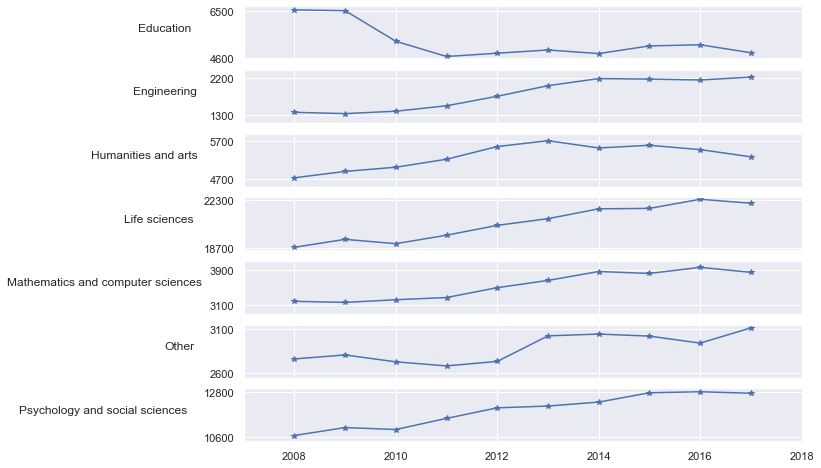

In [19]:
problem3("phd_by_field.csv")

# Problem 5 

<IPython.core.display.Javascript object>


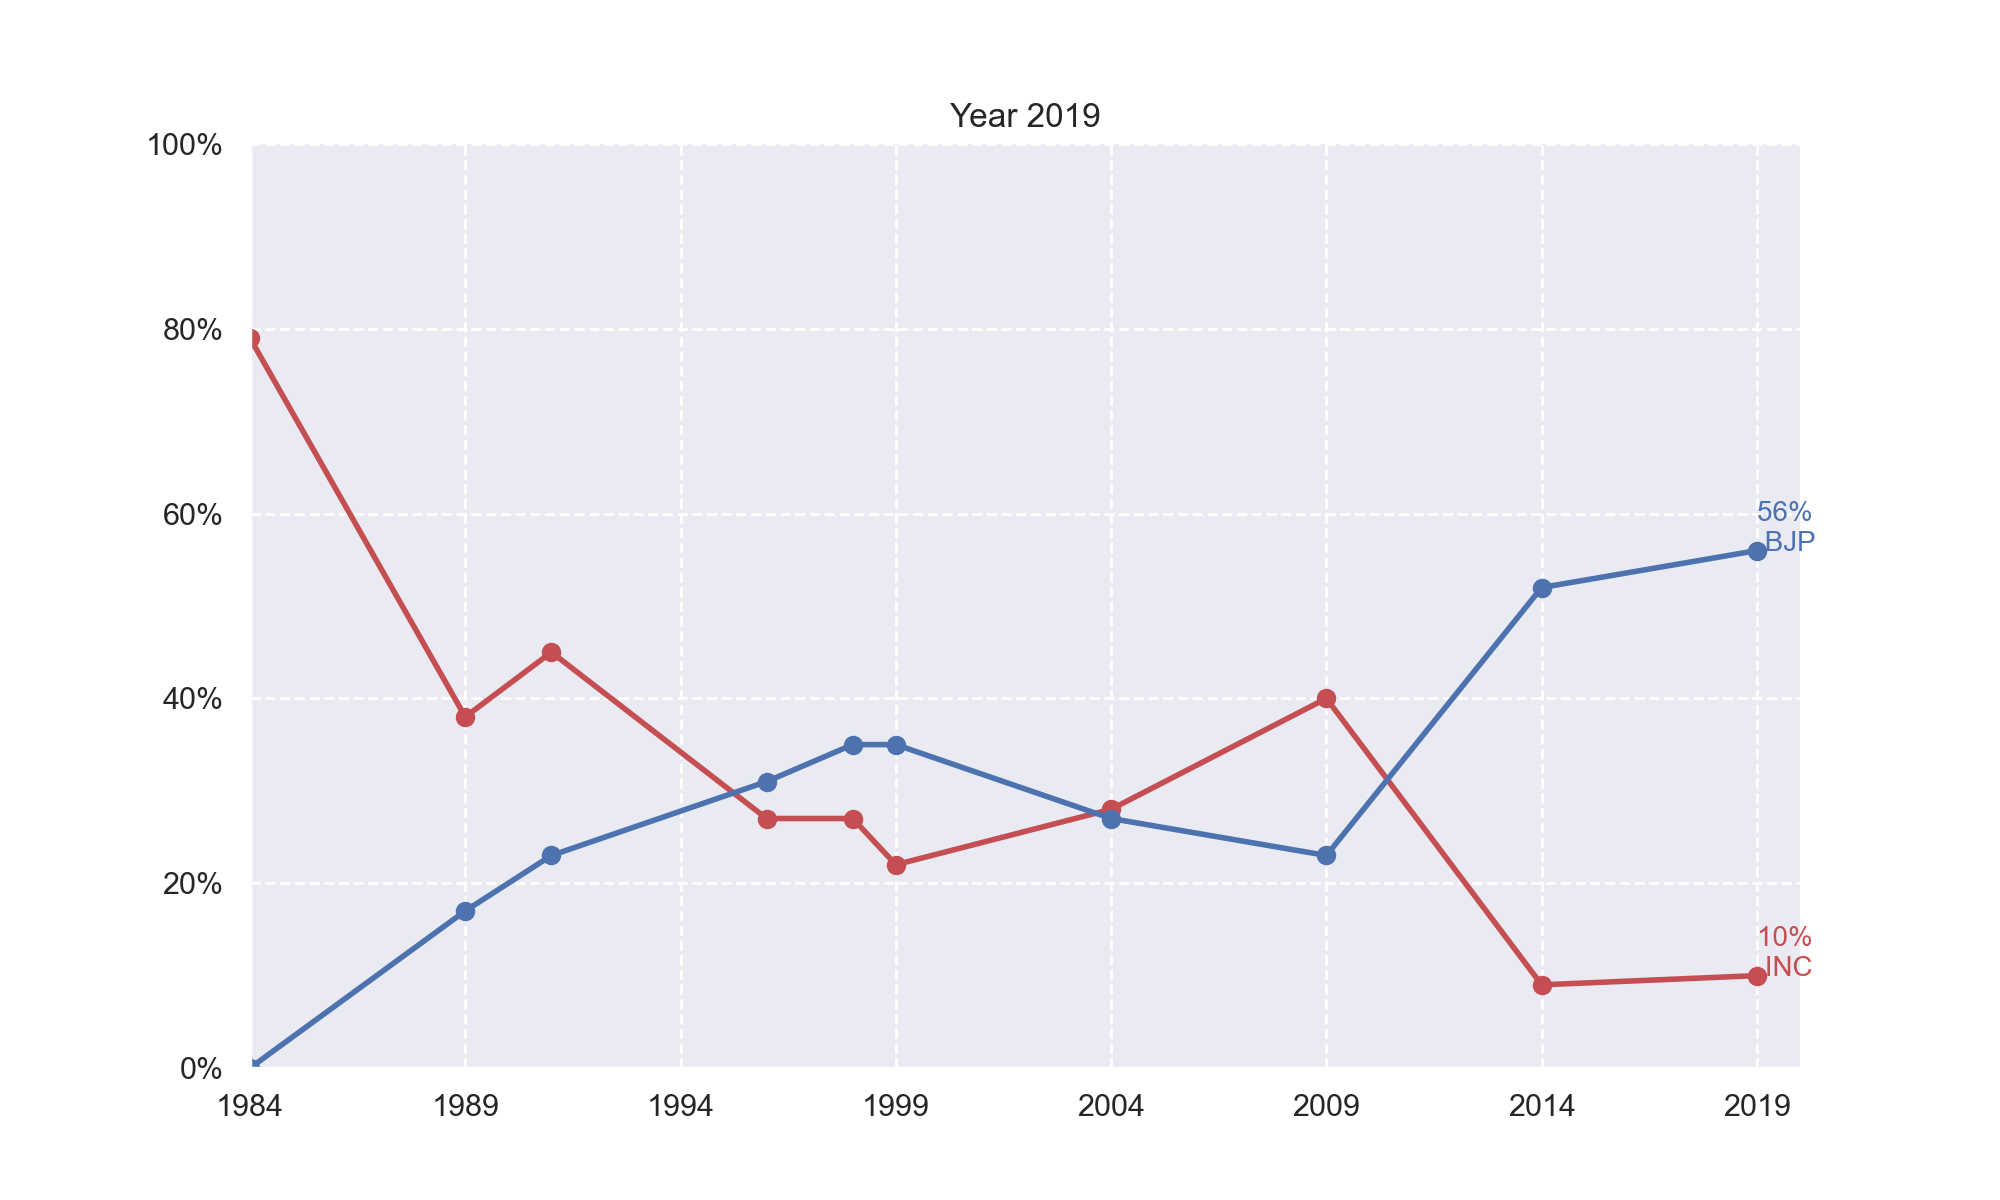

In [24]:
import matplotlib.ticker as mtick
import matplotlib
%matplotlib notebook
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
data = pd.read_csv("indian_elections.dat")
df1 = data['Year Perc_Seats\tParty'].str.split(n=1, expand=True)
df1.columns = ['Year', 'per_seat',]
df3 = df1['per_seat'].str.split(n=1, expand=True)
df3.columns = ['Per', 'Seat',]
new_data = df1.join(df3)
new_data.drop(["per_seat"],inplace=True,axis=1)
new_data['Year']=new_data['Year'].astype(int)
new_data['Per']=new_data['Per'].astype(float)
new_data['Seat']=new_data['Seat'].astype(str)
inc = new_data[new_data["Seat"]=="INC"]
bjp = new_data[new_data["Seat"]=="BJP"]
inc_1 = inc[['Year','Per']]
title = 'Per'
title2 = 'Per'
d2 = bjp
x2 = np.array((d2.iloc[:,:1].values).flatten())
y2 =np.array(d2['Per'])
data2 = np.array([x2, y2])
d = inc_1
x = np.array((d.iloc[:,:1].values).flatten())
y = np.array(d['Per'])
data = np.array([x, y])
overdose = pd.DataFrame(y,x)
overdose2 = pd.DataFrame(y2,x2) 
overdose.columns = {title}
overdose2.columns = {title2}
fig, ax = plt.subplots(figsize=(10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.xlim(1984, 2020)
plt.xticks(list(range(1984,2020,5)))
plt.ylim(0,1)
z=ax.set_title("Year")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True,linestyle ='--')
ax.set_ylabel("")
l, = ax.plot([], [],'r-o',lw=2)
p, = ax.plot([], [],'b-o',lw=2)
annotation_inc = ax.annotate('INC ', xy=(1,0), xytext=(-1,0),color='r')
annotation_bjp = ax.annotate('BJP ', xy=(1,0), xytext=(-1,0),color='b')
new_val = []
for i in inc.Per:
    i = i*100
    new_val.append(i)
inc_new_val = [int(float(nums)) for nums in new_val]
new_val2 = []
for j in bjp.Per:
    j = j*100
    new_val2.append(j)
bjp_new_val = [int(float(nums)) for nums in new_val2]
def animate(i, d, line1, d2, line2):
    line1.set_data(d[..., :i+1])
    line2.set_data(d2[..., :i+1])
    data_inc = overdose.iloc[:int(i+1)] 
    data2_bjp = overdose2.iloc[:int(i+1)]
    z.set_text("Year {:d}".format(data_inc.index[i]))
    annotation_inc.set_position((data_inc.index[i],data_inc.iloc[i]))
    annotation_inc.xy = (data_inc.index[i],data_inc.iloc[i])
    annotation_inc.set_text("%d%% \n INC" % inc_new_val[i])
    annotation_bjp.set_position((data2_bjp.index[i],data2_bjp.iloc[i]))
    annotation_bjp.xy = (data2_bjp.index[i],data2_bjp.iloc[i])
    annotation_bjp.set_text('%d%% \n BJP' % bjp_new_val[i])
annotation_inc = ax.annotate('INC ', xy=(1,0), xytext=(-1,0),color='r')
annotation_bjp = ax.annotate('BJP ', xy=(1,0), xytext=(-1,0),color='b')
line_animation = animation.FuncAnimation(
    fig,  animate,frames=11,fargs=(data, l, data2, p),interval=500)

# Problem 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import datetime as dt
import matplotlib.dates as mdates
pd.options.display.max_columns = None
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate
import plotly
import jupyter_dash as jd

/var/folders/9x/ff2bnh911y3_3gxm4tzzcq3m0000gn/T/ipykernel_40517/1445889006.py:12: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/9x/ff2bnh911y3_3gxm4tzzcq3m0000gn/T/ipykernel_40517/1445889006.py:13: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
def problem4(file):
    data = pd.read_csv(file)
    data.dateRep=pd.to_datetime(data.dateRep,format="%d/%m/%Y")
    
    confirmed_by_country = data.pivot(index="countriesAndTerritories", columns="dateRep", values="cases")
    
    confirmed_7day_mean = confirmed_by_country.rolling(7,axis=1, min_periods=1).mean()
    
    new_date_format = confirmed_by_country.columns.unique().strftime('%Y-%m-%d')
    ############################################################################
    # create drop down menus 
    app = JupyterDash(__name__)
    # Date drop down menu and country drop down menu
    app.layout = html.Div([
        html.Div([
            html.Div([
                   html.Label(['Date']),
        dcc.Dropdown(id='date',style={'height': '50px', 'width': '300px'}, options=[{'label': date, 'value': date}
                                         for date in new_date_format]),
                html.Div([
                    html.Label(['Country']), 
        dcc.Dropdown(id='country',style={'height': '50px', 'width': '200px'}, options=[{'label': country, 'value': country}
                                         for country in confirmed_by_country.index.unique()]),
                ]),
                html.Div([
                    html.Label(["Country"],id='dis')
                ])
            ])
        ])
    ,
        dcc.Graph(id='country_linechart', style={'width': '60%', 'display': 'inline-block'}),dcc.Graph(id='country_linchart', style={'width': '10%', 'display': 'inline-block'})
    ])
    #############################################################################
    # We make display for country averaged
    @app.callback(Output('country_linechart', 'figure'), Input('country', 'value'),Input('date', 'value'))
    def display_country_averaged(country,date):
        if not country:
            raise PreventUpdate
        filtered_df = confirmed_by_country[(confirmed_by_country.columns==country) |
                                 (confirmed_by_country.index == country)]
        loc_country = filtered_df.loc[country]
        line_d = filtered_df.loc[country]
        chart = px.line(line_d,
                        title='7-Day averaged number of cases',height=500 ,
                     width=500).update_layout(
        xaxis_title="Date",xaxis_range=['2020-01-01',date], yaxis_title="Number of Cases",legend_title="Country",
        )
        return chart
    ##############################################################################
    #we make plot for country cumulative
    @app.callback(Output('country_linchart', 'figure'), Input('country', 'value'),Input('date', 'value'))
    def plot_country_Cumulative(country, date):
        if not country:
            raise PreventUpdate
        filtered_df_cum = confirmed_by_country[(confirmed_by_country.columns==country) |
                                 (confirmed_by_country.index == country)]
        line_d2 = filtered_df_cum.loc[country].cumsum()
        fig = px.line(line_d2,
                     title='Cumulative Number of cases',height=500 ,
                     width=500).update_layout(
        xaxis_title="Date",xaxis_range=['2020-01-01',date], yaxis_title="Cumulative Number of Cases",legend_title="Country",
        )
        return fig
    
    @app.callback(Output('dis', 'children'),Input('country', 'value'),Input('date', 'value'))
    #############################################################################
    # display report with respect to country and date.
    def display_report(country,date):
        if country is None:
            return ''
        get_case = data.query("countriesAndTerritories == @country & dateRep == @date ")['cases']
        det_death = data.query("countriesAndTerritories == @country & dateRep == @date ")['deaths']
        return [html.Div([
           html.H3("Number of Cases"),
                f' The Confirmed number of cases of {country} is {get_case.values} .']),
               html.Div([
           html.H3("Number of Death"),
                f' {det_death.values} .'])]
    if __name__ == '__main__':
        app.run_server(mode='inline',height=800, width='100%')

In [3]:
problem4("covid19_ecdc_28_07_20.csv")